<a href="https://colab.research.google.com/github/HariTarz/Mobile_Price_Range_Prediction/blob/main/PS_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

## <b> Data Description </b>

### Data fields
* #### Battery_power - Total energy a battery can store in one time measured in mAh.
* #### Blue - Has bluetooth or not.
* #### Clock_speed - speed at which microprocessor executes instructions.
* #### Dual_sim - Has dual sim support or not.
* #### Fc - Front Camera mega pixels.
* #### Four_g - Has 4G or not.
* #### Int_memory - Internal Memory in Gigabytes.
* #### M_dep - Mobile Depth in cm.
* #### Mobile_wt - Weight of mobile phone.
* #### N_cores - Number of cores of processor.
* #### Pc - Primary Camera mega pixels.
* #### Px_height - Pixel Resolution Height.
* #### Px_width - Pixel Resolution Width.
* #### Ram - Random Access Memory in Mega Bytes.
* #### Sc_h - Screen Height of mobile in cm.
* #### Sc_w - Screen Width of mobile in cm.
* #### Talk_time - longest time that a single battery charge will last when you are.
* #### Three_g - Has 3G or not.
* #### Touch_screen - Has touch screen or not.
* #### Wifi - Has wifi or not.
* #### Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).



## Import libraries

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Mounting the drive and reading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Creating a the dataset file that and reading the dataset
path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Supervised ML - Classification Capstone Project/PS - Mobile Price Range Prediction/dat/data_mobile_price_range.csv'
data = pd.read_csv(path)

## Exploring the dataset

In [4]:
# Viewing the dataset for first time
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Viewing the size of the dataset
data.shape

(2000, 21)

In [7]:
# Checking for null values in the dataset
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
# Checking for categoriacal values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis

### Categotical Features

Text(0.5, 1.0, 'price_range counts')

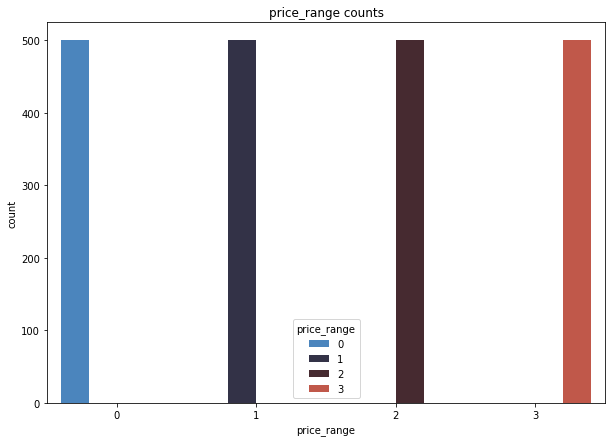

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.gca()
sns.countplot(x='price_range', data=data, hue='price_range', palette= 'icefire')
sns.set_theme(style='whitegrid')
ax.set_xlabel('price_range')
# ax.set_ylabel('Frequency')
ax.set_title('price_range counts')

In [11]:
categorical_columns= [ 'blue',  'dual_sim',  'four_g', 'three_g', 'touch_screen', 'wifi', 'n_cores']

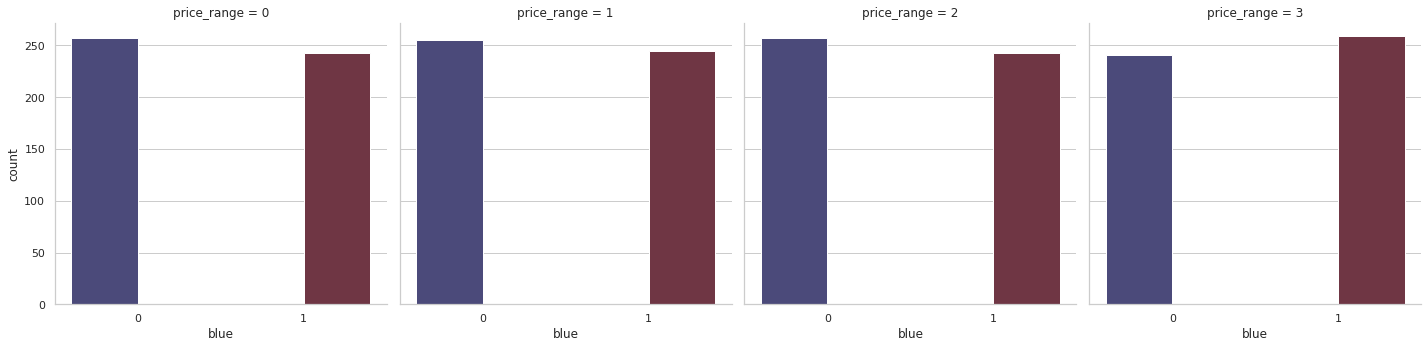

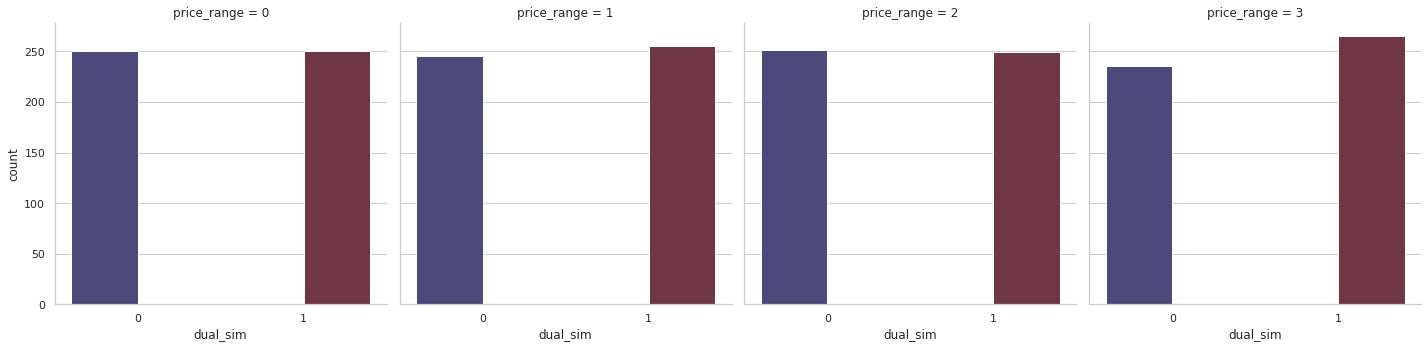

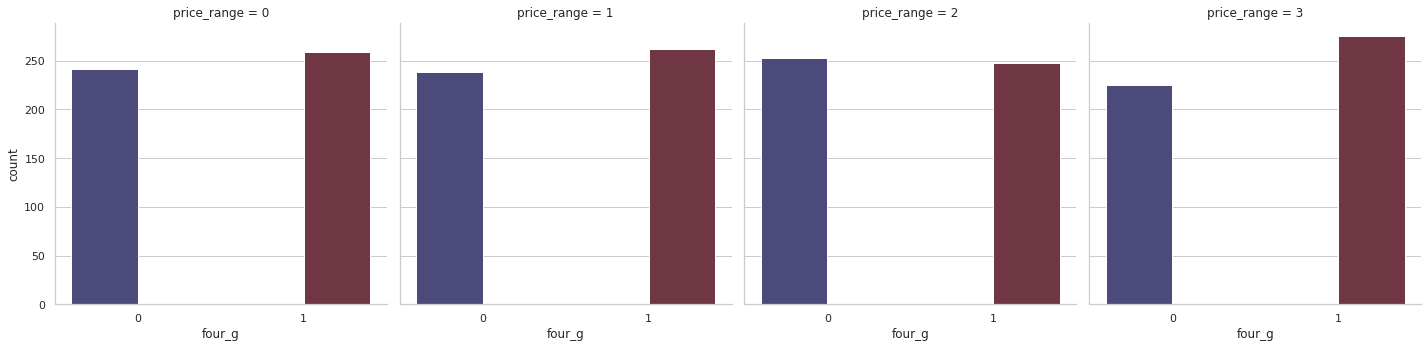

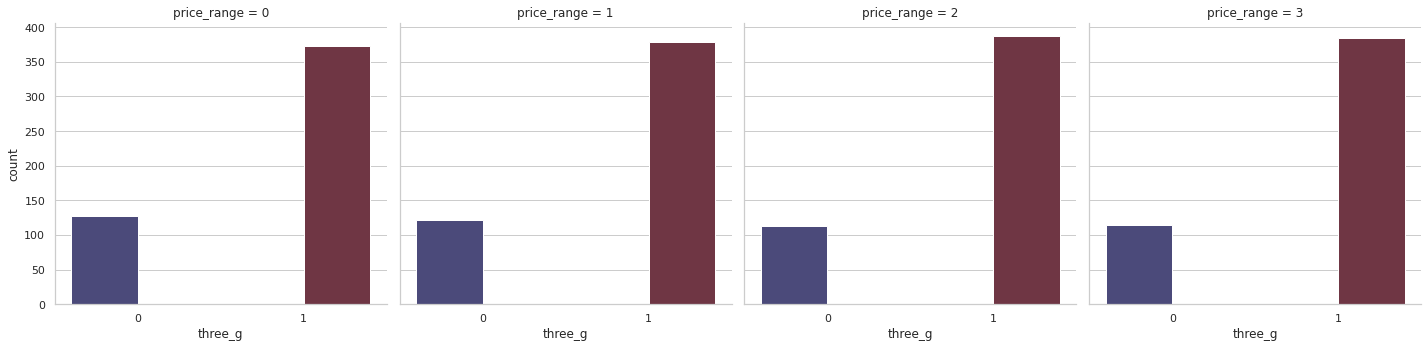

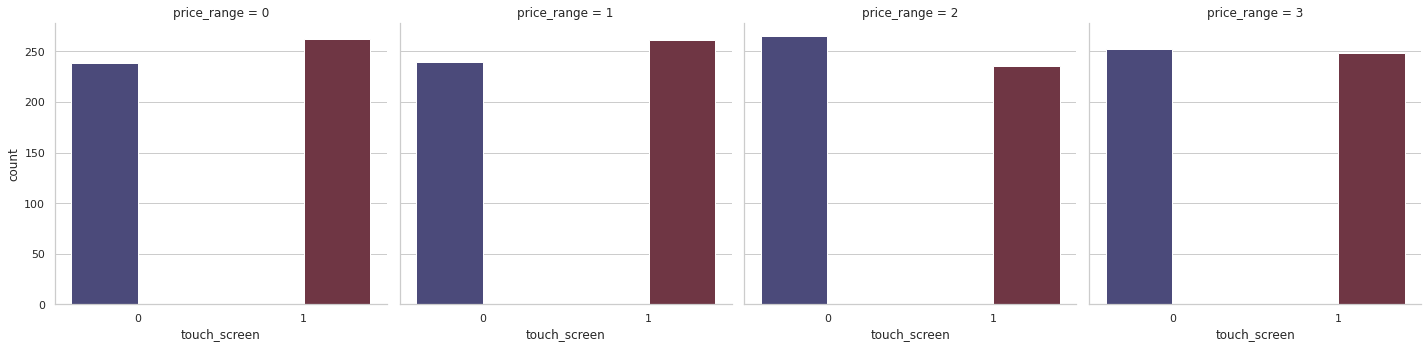

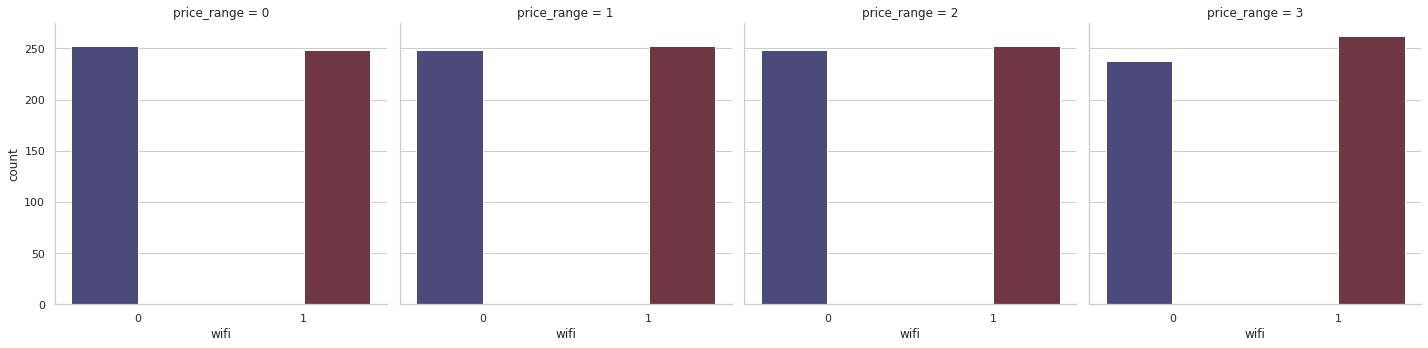

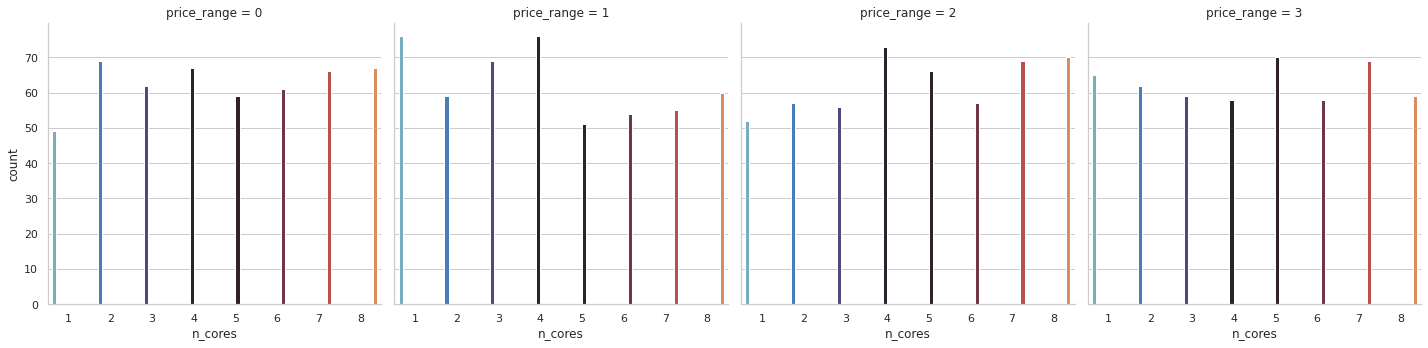

In [12]:
for col in categorical_columns:
  sns.catplot(x=col, hue=col, col="price_range", data=data, kind="count", height=5, aspect=1, palette= 'icefire');
  sns.set_theme(style='whitegrid')

### Continous Features

Text(0.5, 1.0, 'Battery power VS price range')

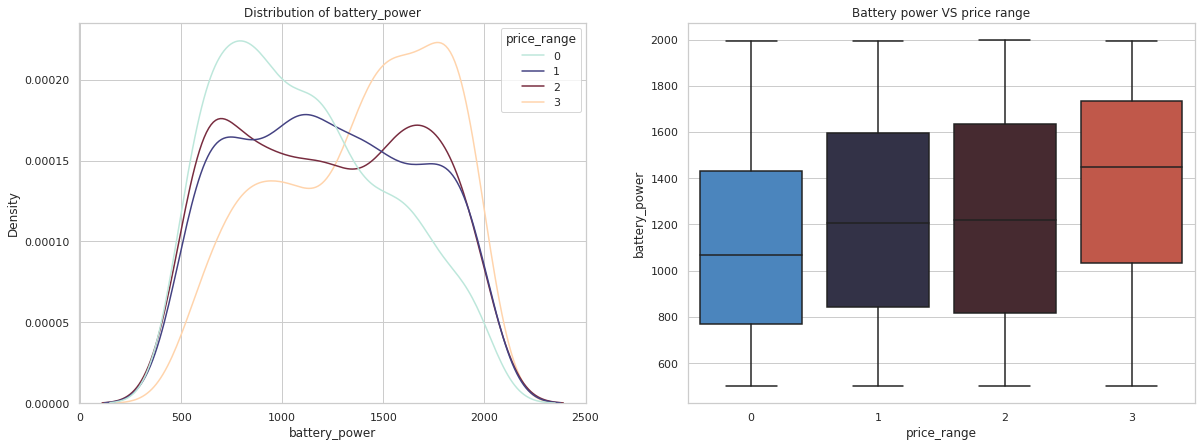

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="battery_power", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of battery_power')
sns.boxplot(y="battery_power", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Battery power VS price range')

Text(0.5, 1.0, 'clock_speed VS price range')

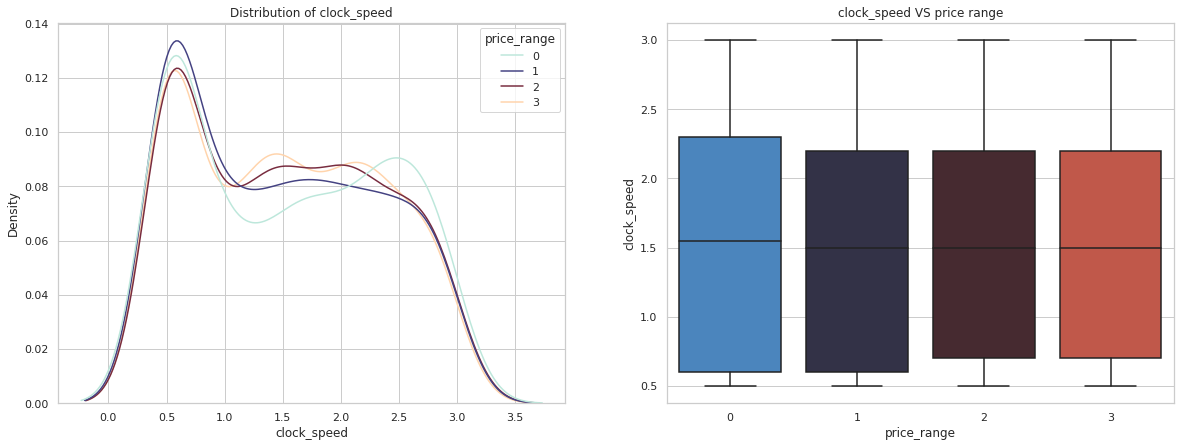

In [14]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="clock_speed", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of clock_speed')
sns.boxplot(y="clock_speed", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('clock_speed VS price range')

Text(0.5, 1.0, 'Front camera resolution (fc) VS price range')

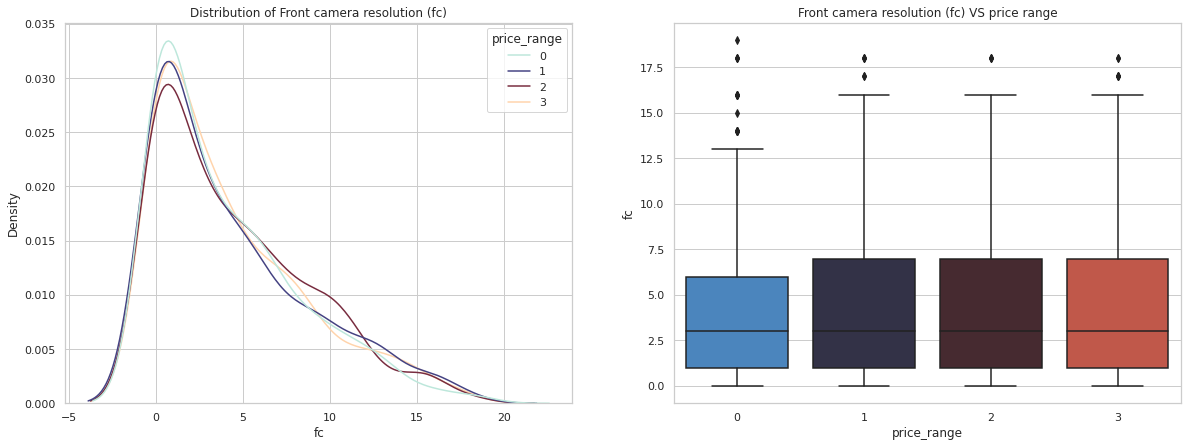

In [15]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="fc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Front camera resolution (fc)')
sns.boxplot(y="fc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Front camera resolution (fc) VS price range')

Text(0.5, 1.0, 'Primary camera resolution (fc) VS price range')

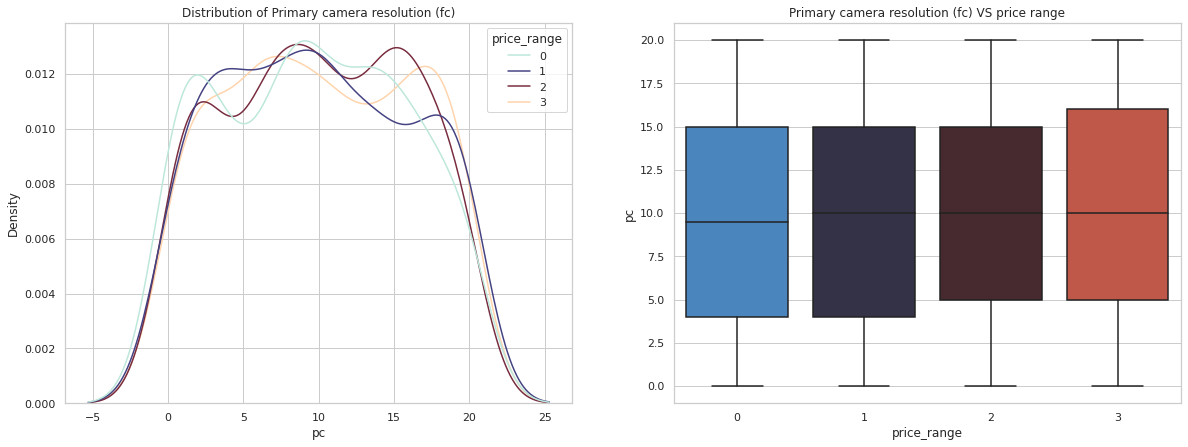

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="pc", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of Primary camera resolution (fc)')
sns.boxplot(y="pc", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('Primary camera resolution (fc) VS price range')

Text(0.5, 0, 'Front Camera(Red) - Rear Camera(Blue')

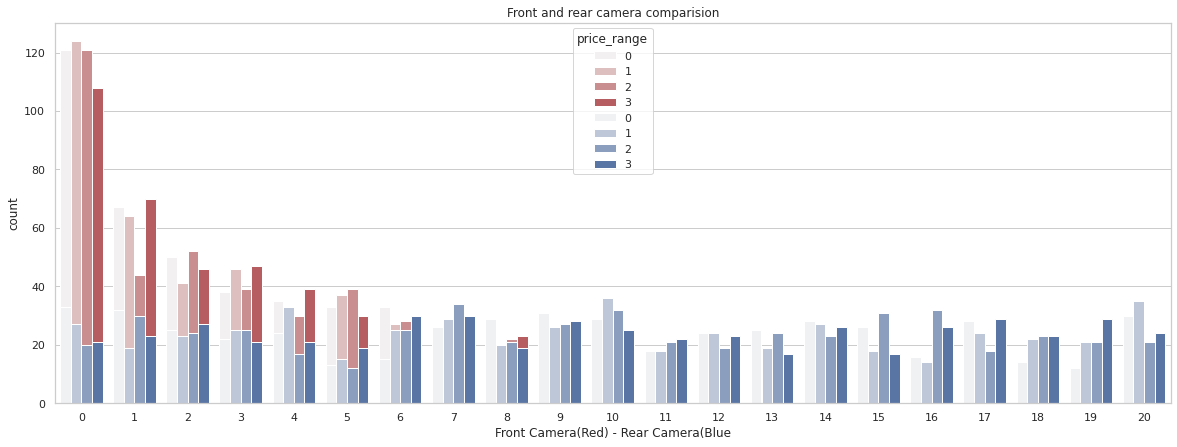

In [17]:
fig, ax = plt.subplots(figsize=(20,7))
sns.countplot(x='fc', data=data, hue='price_range' ,color= 'r', ax=ax)
sns.countplot(x='pc', data=data, hue='price_range', color= 'b', ax=ax)
ax.set_title('Front and rear camera comparision')
ax.set_xlabel('Front Camera(Red) - Rear Camera(Blue')

Text(0.5, 1.0, 'internalmemory VS price range')

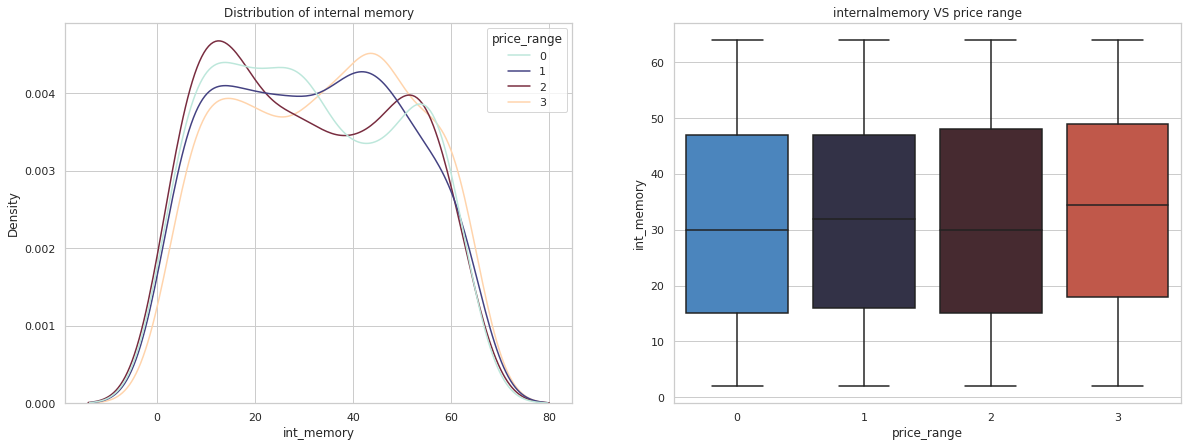

In [18]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="int_memory", hue="price_range", data=data, palette= 'icefire', ax=ax[0])
ax[0].set_title('Distribution of internal memory')
sns.boxplot(y="int_memory", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('internalmemory VS price range')

Text(0.5, 1.0, 'mobile depth VS price range')

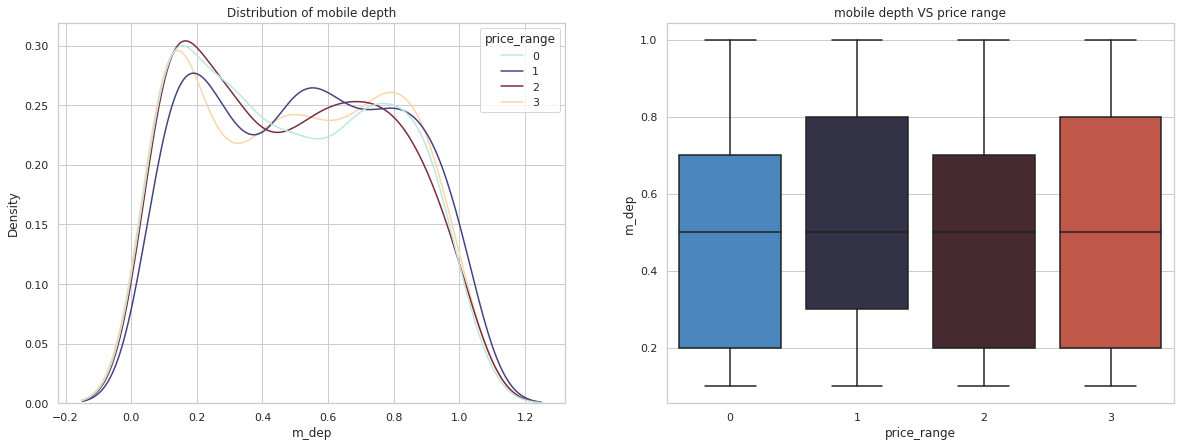

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="m_dep", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile depth')
sns.boxplot(y="m_dep", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile depth VS price range')

Text(0.5, 1.0, 'mobile width VS price range')

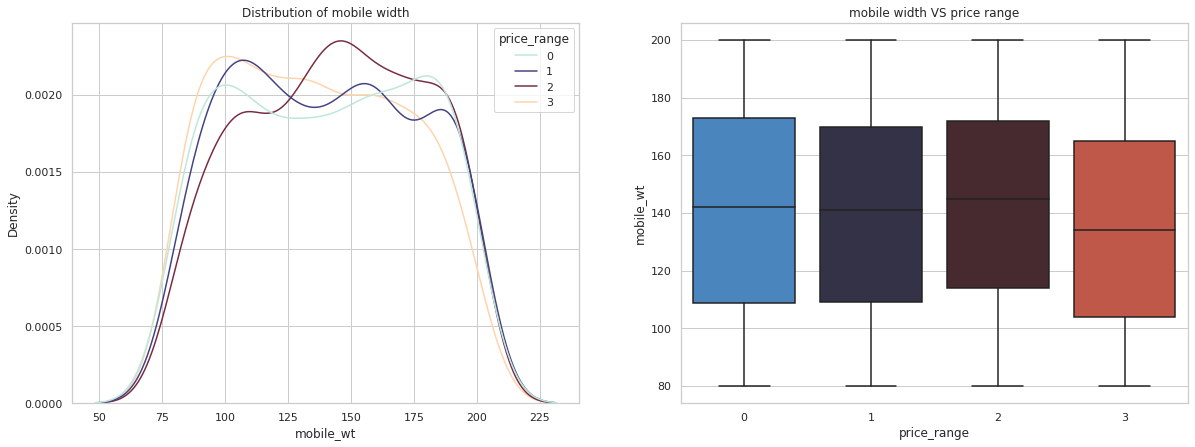

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="mobile_wt", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of mobile width')
sns.boxplot(y="mobile_wt", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('mobile width VS price range')

Text(0.5, 1.0, 'pixels height VS price range')

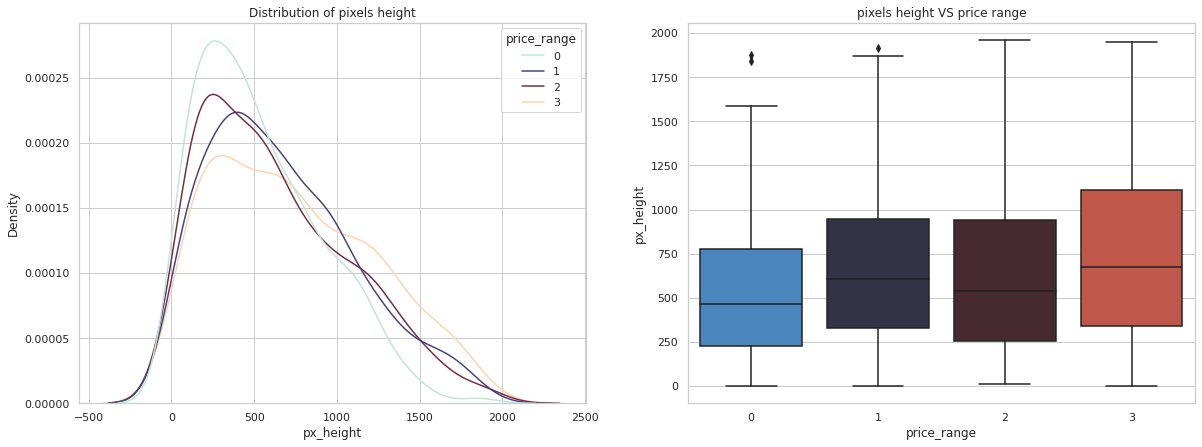

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_height", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels height')
sns.boxplot(y="px_height", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels height VS price range')

Text(0.5, 1.0, 'pixels width VS price range')

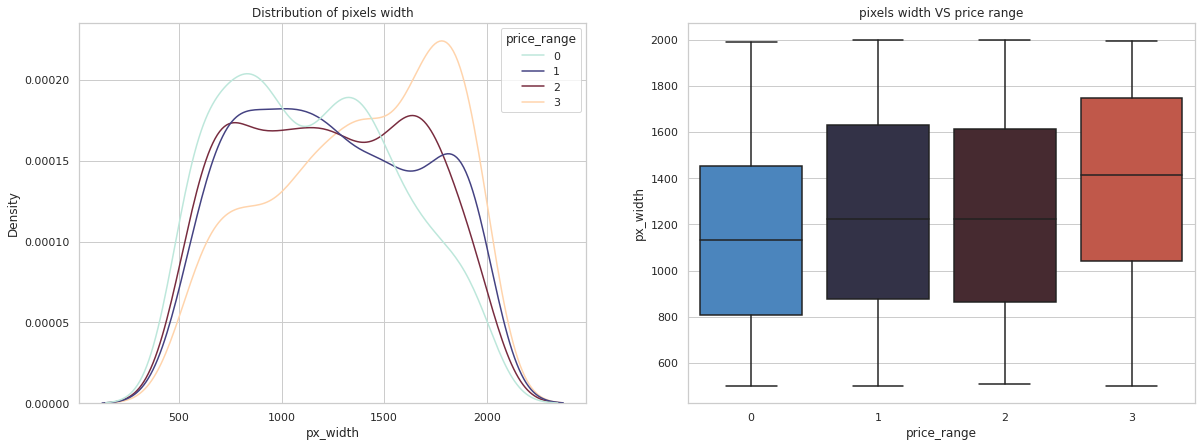

In [22]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="px_width", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of pixels width')
sns.boxplot(y="px_width", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('pixels width VS price range')

Text(0.5, 1.0, 'ram size(in GB) VS price range')

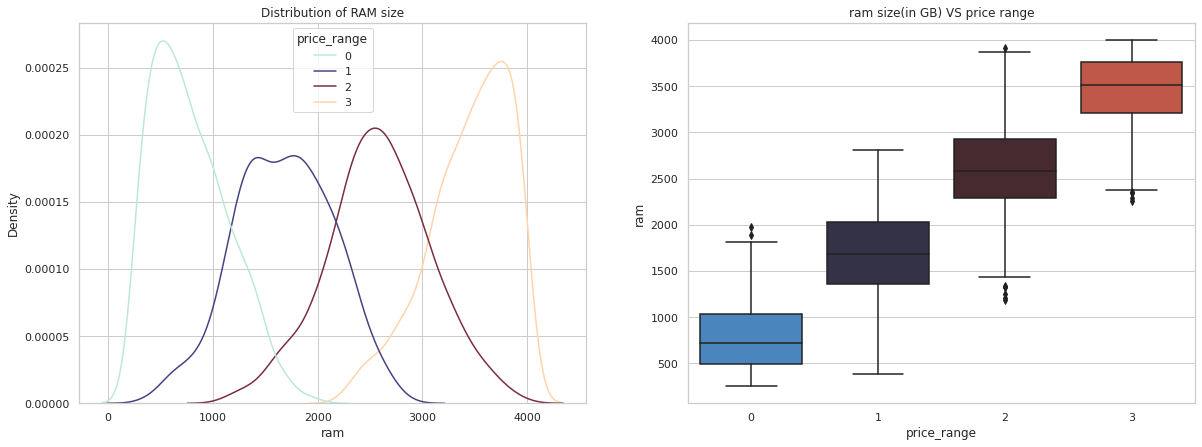

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="ram", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of RAM size')
sns.boxplot(y="ram", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('ram size(in GB) VS price range')

Text(0.5, 1.0, 'screen height(in CM) VS price range')

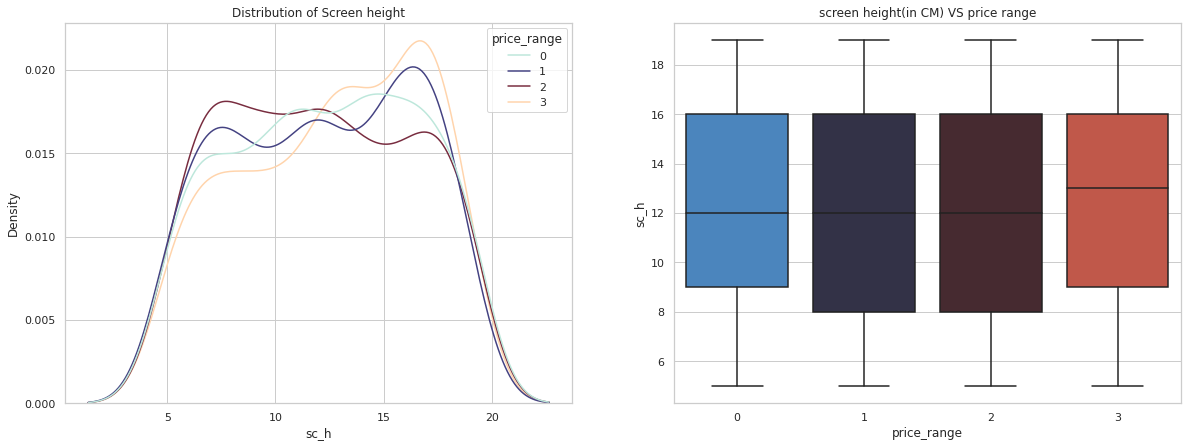

In [24]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_h", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen height')
sns.boxplot(y="sc_h", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen height(in CM) VS price range')

Text(0.5, 1.0, 'screen width(in CM) VS price range')

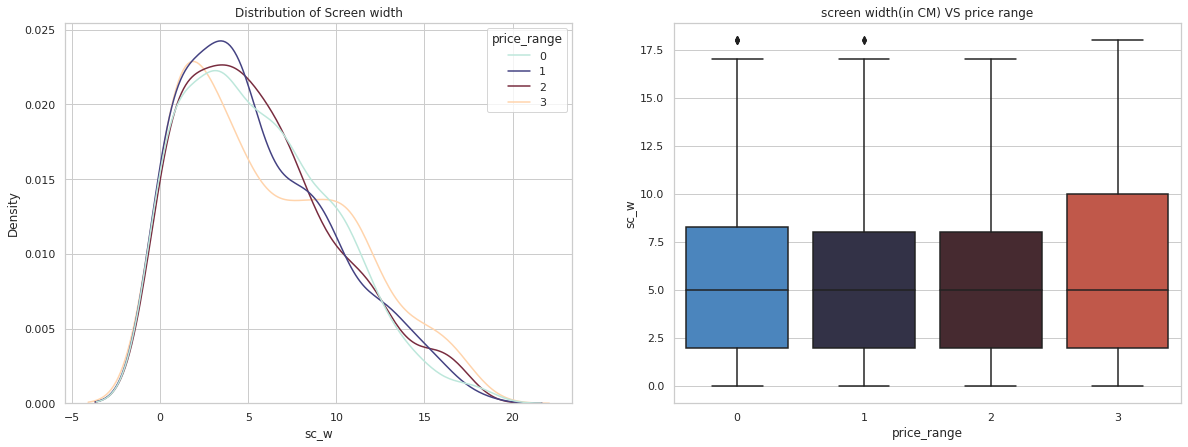

In [25]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="sc_w", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Screen width')
sns.boxplot(y="sc_w", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('screen width(in CM) VS price range')

Text(0.5, 1.0, 'talk_time(in hours) VS price range')

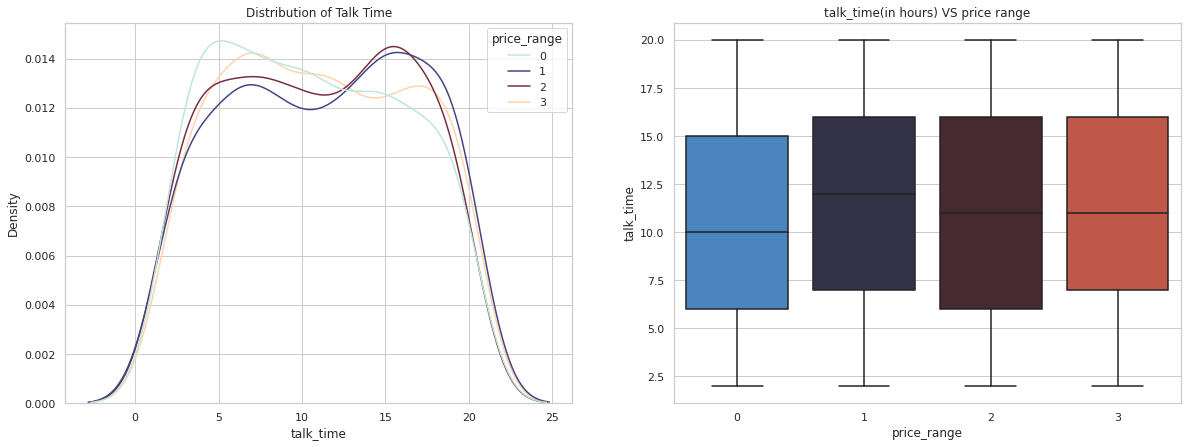

In [26]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
sns.kdeplot(x="talk_time", hue="price_range", data=data, palette= 'icefire',  ax=ax[0])
ax[0].set_title('Distribution of Talk Time')
sns.boxplot(y="talk_time", x="price_range", data=data, palette='icefire', ax=ax[1])
ax[1].set_title('talk_time(in hours) VS price range')